Use of TRandom https://root.cern.ch/doc/master/classTRandom.html#aac1fe20159b9b79d8831f6edb4e35be0

if no seed is given, default is 1

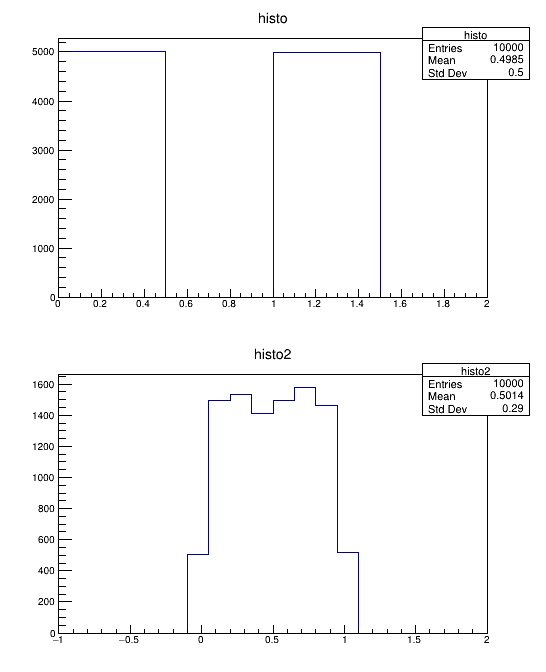

Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histo2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [70]:
iterations = 10000;
seed = 1;

TH1F *histo = new TH1F("histo","histo",4,0,2);
TH1F *histo2 = new TH1F("histo2","histo2",20,-1,2);
vector <double> vec_r(iterations);
TRandom2 *rand = new TRandom2(seed);

for(int i = 0; i < iterations ; i++){
    double r = rand->Rndm();
    int rr = rand->Binomial(1,0.5);
    
    vec_r[i] = r;    
    histo->Fill(rr);
}

for(int i = 0; i < vec_r.size(); i++){
    histo2->Fill(vec_r[i]);
}

TCanvas *canvas = new TCanvas("Canvas","",550,700);
canvas->Divide(1,2);
histo->SetStats(1);
// histo->SetBit(TH1::kNoStats);
canvas->cd(1);  histo->Draw();
canvas->cd(2);  histo2->Draw();
canvas->Draw();

### Creating an array of $n$ lorentz vectors

# Operating histograms

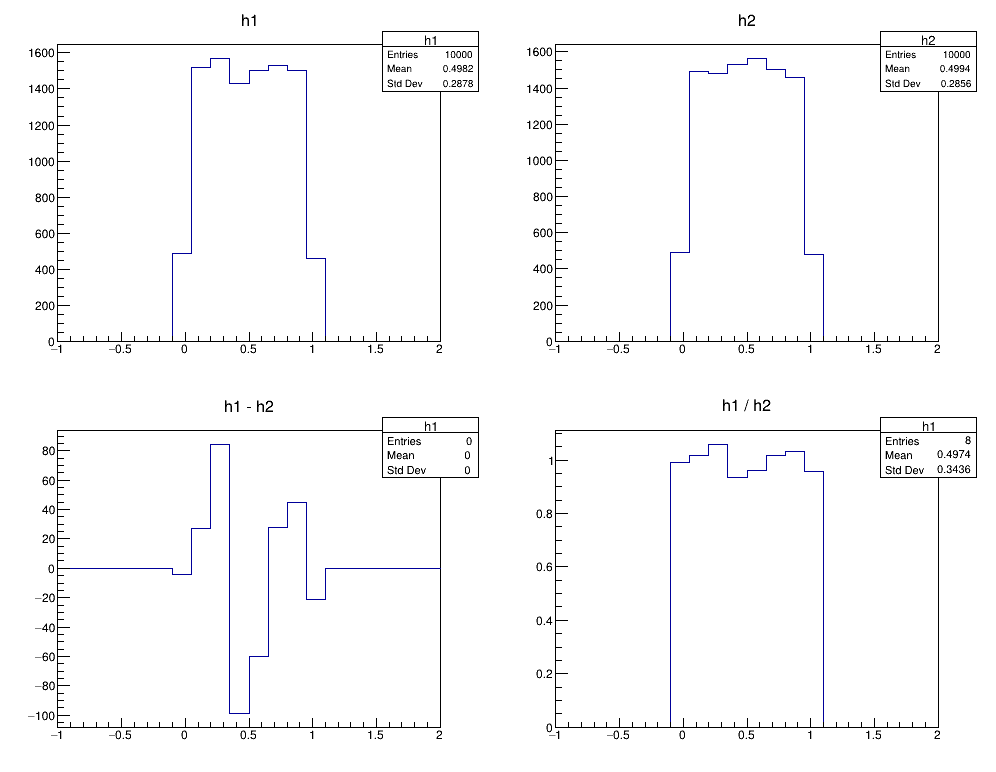

In [2]:
TRandom2 *rand = new TRandom2();
TRandom2 *rand2 = new TRandom2(2);

TH1F *h1 = new TH1F("h1","h1",20,-1,2);
TH1F *h2 = new TH1F("h2","h2",20,-1,2);

for(int i = 0; i < 10000; i++){
    double r = rand->Rndm();
    double r2 = rand2->Rndm();
    h1->Fill(r);
    h2->Fill(r2);
}

// CLONING H1
TH1F *h1_copy = (TH1F*) h1->Clone();
TH1F *h1_copy2 = (TH1F*) h1->Clone();

// SUBSTRACTION 
h1_copy->Add(h2, -1);  h1_copy->SetTitle("h1 - h2");
// DIVISION
h1_copy2->Divide(h2);  h1_copy2->SetTitle("h1 / h2");

// PLOTTING
TCanvas *canvas = new TCanvas("Canvas","",1000,800);
canvas->Divide(2,2);

canvas->cd(1); h1->Draw();
canvas->cd(2); h2->Draw();
canvas->cd(3); h1_copy->Draw();
canvas->cd(4); h1_copy2->Draw();
canvas->Draw();

### GetBinContent(), GetNcells(), SetBinContent()

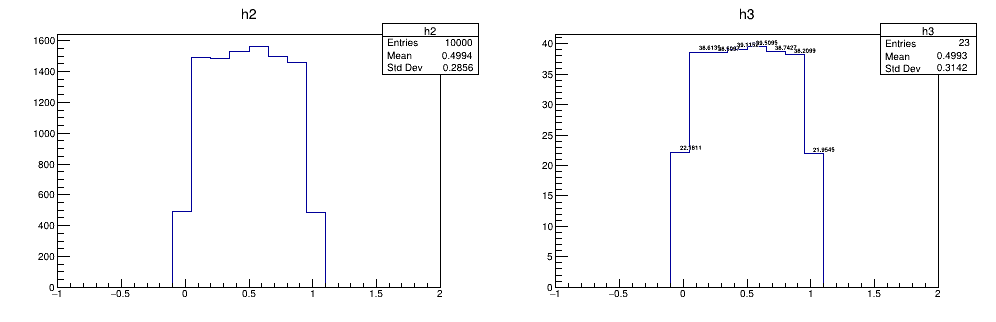

h2 Ncells: 22
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 492
9 1491
10 1483
11 1530
12 1561
13 1501
14 1460
15 482
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0


Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [22]:
int count = 1;
TH1F *h3 = new TH1F("h3","h3",20,-1,2);

cout  << "h2 Ncells: " << h2->GetNcells() << endl ;
for (int bin=0; bin<=h2->GetNcells(); ++bin) {
    h3->SetBinContent(bin, sqrt(h2->GetBinContent(bin)));
    cout  << count << " " << h2->GetBinContent(bin) << endl ;
    count++;
}

TCanvas *canvas = new TCanvas("Canvas","",1000,350); canvas->Divide(2,1);
canvas->cd(1); h2->Draw(); 
canvas->cd(2); h3->Draw("text colz1"); 
canvas->Draw()

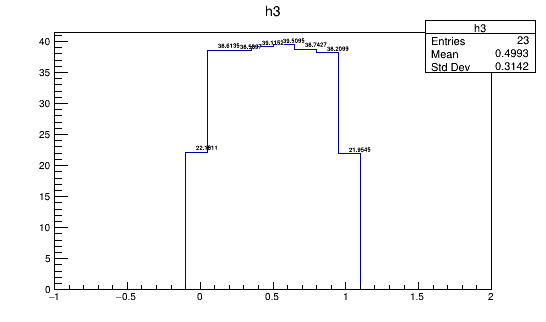

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [15]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);
h3->Draw("text colz1"); canvas->Draw()

## Example X (bin entries showing)
Sometimes the change of the range of the Z axis is unwanted, in which case, one can use SAME0 (or SAMES0) option to opt out of this change.
https://root.cern/doc/master/classTHistPainter.html



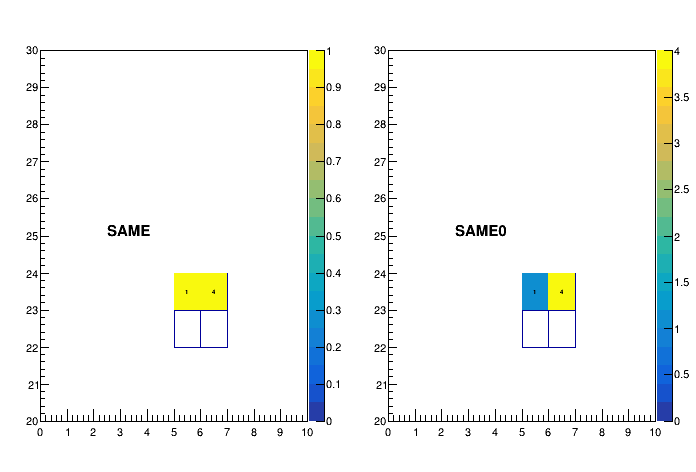

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [80]:
auto h2 = new TH2F("h2"," ",10,0,10,10,20,30);
auto hf = (TH2F*)h2->Clone("hf");
h2->SetBit(TH1::kNoStats);
hf->SetBit(TH1::kNoStats);
h2->Fill(5,22);
h2->Fill(5,23);
h2->Fill(6,22);
h2->Fill(6,23);
hf->Fill(6,23);
hf->Fill(6,23);
hf->Fill(6,23);
hf->Fill(6,23);
hf->Fill(5,23);

auto hf_copy1 = hf->Clone("hf_copy1");
auto lt = new TLatex();

auto cx = new TCanvas(); cx->Divide(2,1);

cx->cd(1);
h2->Draw("box");
hf->Draw("text colz same");
lt->DrawLatexNDC(0.3,0.5,"SAME");

cx->cd(2);
h2->Draw("box");
hf_copy1->Draw("text colz same0");
lt->DrawLatexNDC(0.3,0.5,"SAME0");
cx->Draw()

## 5.19 3D Implicit Functions 
https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html

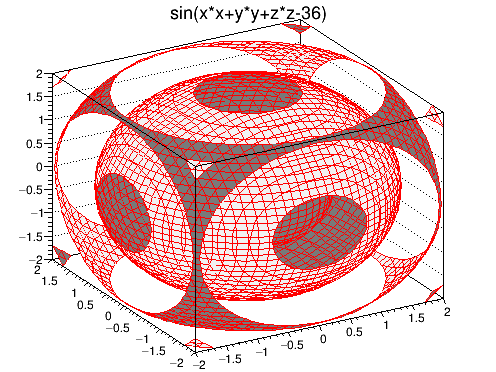

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [77]:
TCanvas *canvas = new TCanvas("Canvas","",500,400);
TF3 *fun3 = new TF3("fun3","sin(x*x+y*y+z*z-36)",-2,2,-2,2,-2,2);
fun3->Draw();
canvas->Draw();

The COLor option https://root.cern/doc/master/classTHistPainter.html#HP14